## Pet Adoption Status Predictions

Our goal is to determine the various factors that influence pet adoption in order to predict which pets are more likely to be adopted. This dataset is imperative in finding solutions focused on increasing pet adoption rates. Therefore, using machine learning to find predictions can be an important tool in finding these solutions.


In [4]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn as skl

In [7]:
# Create a path to CSV files, read the path and print DataFrame
file_path = (r"C:\Users\jobel\OneDrive\Documents\UM\Project_4_Group_2\Project4Group2\pet_adoption_data.csv")
pet_adoption = pd.read_csv(file_path)
pet_adoption

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [8]:
pet_adoption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [9]:
# Clean Data: Drop all of the duplicates
pet_adoption_clean = pet_adoption.drop_duplicates(subset=None, keep='first', inplace=False)
pet_adoption_clean

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [10]:
# Clean Data: Drop all of the Null Values
pet_adoption_clean = pet_adoption_clean.dropna(axis=1)
pet_adoption_clean

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [11]:
# Review Statistics
pet_adoption_clean.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [31]:
# Rename columns
pet_adoption_renamed = pet_adoption_clean.rename(columns={"PetID":"Pet_ID", "PetType":"Pet_Type","AgeMonths": "Age_in_Months", "WeightKg":"Weight_in_Kg", "HealthCondition":"Health_Condition",
                                                          "TimeInShelterDays":"Days_in_Shelter", "AdoptionFee":"Adoption_Fee", "PreviousOwner":"Previous_Owner",
                                                          "AdoptionLikelihood":"Adoption_Likelihood"})
pet_adoption_renamed

,Pet_ID,Pet_Type,Breed,Age_in_Months,Color,Size,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Adoption_Likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [10]:
# Export pet_adoption_renamed as a CSV file.
pet_adoption_renamed.to_csv("C:/Users/alexi/Desktop/Project4Group2/pet_adoption_renamed.csv", index=False)

In [32]:
pet_adoption_renamed.head()

,Pet_ID,Pet_Type,Breed,Age_in_Months,Color,Size,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Adoption_Likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [17]:
import scipy.stats as st

The r-value is:-0.20220897333608412


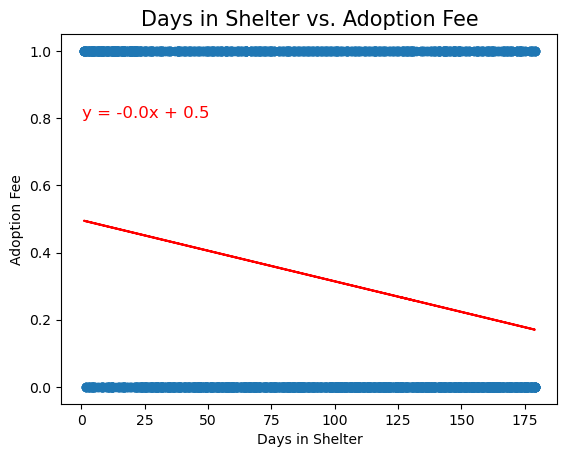

In [28]:
x_values = pet_adoption_renamed['Age in Months']
y_values = pet_adoption_renamed['Adoption Likelihood']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.4,0.8),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Days in Shelter vs. Adoption Fee', fontsize=15)
plt.xlabel('Days in Shelter')
plt.ylabel('Adoption Fee')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.24406135628994466


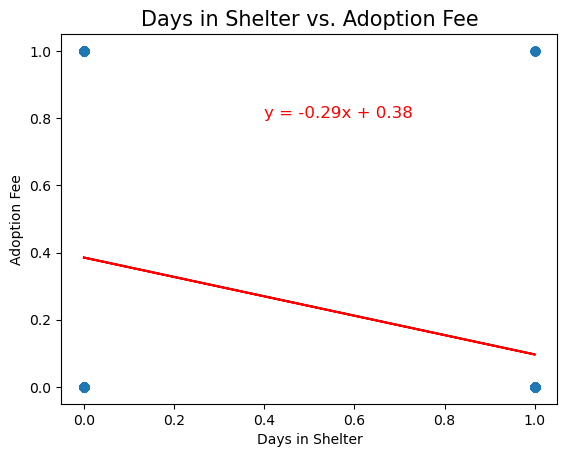

In [26]:
x_values = pet_adoption_renamed['Health Condition']
y_values = pet_adoption_renamed['Adoption Likelihood']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.4,0.8),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Days in Shelter vs. Adoption Fee', fontsize=15)
plt.xlabel('Days in Shelter')
plt.ylabel('Adoption Fee')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
figure_mode = pet_adoption_renamed.plot(kind="pie", y= mode, autopct="%1.0f%%")
figure_mode.set_ylabel("Mode")
plt.title("Dominating Mode")
plt.savefig("output_data/major_vs_minor.png")
plt.show()

In [36]:
features = ['Pet_ID', 'Pet_Type', 'Breed', 'Age_in_Months', 'Color', 'Size', 'Weight_in_Kg', 'Vaccinated', 'Health_Condition', 'Days_in_Shelter', 'Adoption_Fee', 'Previous_Owner', 'Adoption_Likelihood']
X = pet_adoption_renamed[features]

In [39]:
y = pet_adoption_renamed['Adoption_Likelihood']

In [40]:
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
pet_model = LogisticRegression(max_iter=1000)
pet_model.fit(train_X,train_y)

ValueError: could not convert string to float: 'Cat'